In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [6]:
data = pd.read_excel('dataframe3.xlsx', sheet_name = 'Dataframe')
df = data.copy() #une copie pour garder l'original de côté
df.tail()

,Observation,Category
1111,O3M Inspection du joint de la vanne fourreau,S/O
1112,DF Bruit anormale puit turbine A31,S/O
1113,O3M Vérification niveau réservoir,S/O
1114,O3M Remplacement du joint de la vanne fourreau...,S/O
1115,O3/MEC VÉRIFICATION ET ESSAI VANNE FOURREAU GR 33,S/O


In [3]:
df.shape  #dimensions

(1116, 2)

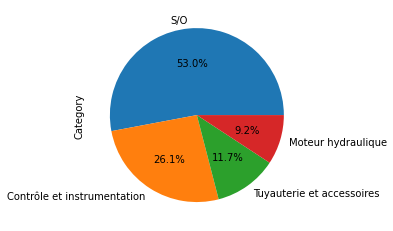

In [7]:
df.Category.value_counts().plot.pie(autopct="%.1f%%") #Répartion des classes en proportion

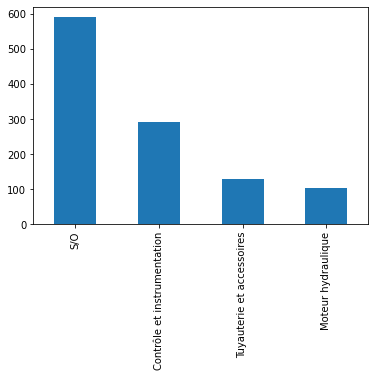

In [8]:
df.Category.value_counts().plot(kind='bar') # Répartition des classes en effectif

## Nettoyage

In [9]:
documents = [doc for doc in df.Observation] # on place tous les texte dans une liste pour faciliter leur traitement
documents = [re.sub("\sSM", " servomoteur ", doc) for doc in documents] #remplace l'abréviation SM par servomoteur
documents2 = [doc.lower() for doc in documents]# Tout en lettres minuscules pour faciliter le traitement
documents2 = [re.sub("servo-moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("servo moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("servo -moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("servo- moteur", " servomoteur ", doc) for doc in documents2]
documents2 = [re.sub("selenoid", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("selenoide", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("sélénoid", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("sélénoide", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("solenoïde", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("solenoid", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("solénoide", " solénoïde ", doc) for doc in documents2]
documents2 = [re.sub("disj.\s", " disjoncteur ", doc) for doc in documents2]
documents2 = [re.sub("alim.\s", " alimentation ", doc) for doc in documents2]
documents2 = [re.sub("ind.\s", " indique ", doc) for doc in documents2]
documents2 = [re.sub("cmd\s", " commande ", doc) for doc in documents2]
documents2 = [re.sub("cmde", " commande ", doc) for doc in documents2]
documents2 = [re.sub("stafa", "staffa", doc) for doc in documents2]
documents2 = [re.sub("stapha", "staffa", doc) for doc in documents2]
documents2 = [re.sub("stafa", "staffa", doc) for doc in documents2]
documents2 = [re.sub("guarde", "garde", doc) for doc in documents2]
documents2 = [re.sub("foureau", "fourreau", doc) for doc in documents2]
# suppression des mots vanne, fourreau et garde
documents2 = [re.sub("vanne", " ", doc) for doc in documents2]
documents2 = [re.sub("fourreau", " ", doc) for doc in documents2]
documents2 = [re.sub("garde", " ", doc) for doc in documents2]
# Suppression de tous les caractères non alphabétiques
documents2 = [re.sub("[\d\W]+", " ", doc) for doc in documents2]
#suppression des mots contenant moins de trois caractères
documents2 = [re.sub(r'\s+', ' ', doc, flags=re.I) for doc in documents2] #suppression des espaces en trop
#Tokenization
tokens = [[word for word in doc.split() if len(word)>2] for doc in documents2] # Tokens en supprimant les mots dont len<3

## Stemming

In [10]:
# On normalise les tokens en transformant les mots en leur racine
from nltk.stem import SnowballStemmer

stem = [[SnowballStemmer('french').stem(word) for word in doc] for doc in tokens] # stemming 

from nltk.corpus import stopwords 

stopword = stopwords.words('french')
stem2 = [[word for word in doc if word not in stopword] for doc in stem] # liste stem actualisée sans les stopwords

df['tokens'] = tokens
df['stem_tokens_no_stopwords'] = stem2

def list_to_string(txt):
    txt = ' '.join(txt)
    return txt

df['clean_sentence'] = df['stem_tokens_no_stopwords'].apply(lambda x: list_to_string(x)) 

df = df.drop_duplicates(subset='clean_sentence', keep='first') #Suppression des duplications
df.shape

(906, 5)

In [13]:
df.tokens.isnull().value_counts() # Aucune ligne nulle

False    906
Name: tokens, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['Category'])

In [18]:
df

,Observation,Category,tokens,stem_tokens_no_stopwords,clean_sentence,target
0,Fuite d'huile moteurs V.F. Staffa A4,Moteur hydraulique,"[fuite, huile, moteurs, staffa]","[fuit, huil, moteur, staff]",fuit huil moteur staff,1
1,REMISE À NEUF MOTEUR STAFFA V. F. GROUPES Gr11,Moteur hydraulique,"[remise, neuf, moteur, staffa, groupes]","[remis, neuf, moteur, staff, group]",remis neuf moteur staff group,1
2,fuite d'huile importante sur moteur 2,Moteur hydraulique,"[fuite, huile, importante, sur, moteur]","[fuit, huil, import, moteur]",fuit huil import moteur,1
3,remplacer moteur Staffa,Moteur hydraulique,"[remplacer, moteur, staffa]","[remplac, moteur, staff]",remplac moteur staff,1
4,Bloqué par interférence moteur #1,Moteur hydraulique,"[bloqué, par, interférence, moteur]","[bloqu, interférent, moteur]",bloqu interférent moteur,1
...,...,...,...,...,...,...
1111,O3M Inspection du joint de la vanne fourreau,S/O,"[inspection, joint]","[inspect, joint]",inspect joint,2
1112,DF Bruit anormale puit turbine A31,S/O,"[bruit, anormale, puit, turbine]","[bruit, anormal, puit, turbin]",bruit anormal puit turbin,2
1113,O3M Vérification niveau réservoir,S/O,"[vérification, niveau, réservoir]","[vérif, niveau, réservoir]",vérif niveau réservoir,2
1114,O3M Remplacement du joint de la vanne fourreau...,S/O,"[remplacement, joint]","[remplac, joint]",remplac joint,2


## Fréquence des mots et visualisation

In [19]:
from nltk import FreqDist

cat_0 = [] #Contrôle et instrumentation
cat_1 = [] # Moteur hydraulique
cat_2 = [] # S/O
cat_3 = [] # Tuyauterie et accessoire
cat = [0, 1, 2, 3]
for i in cat:
    for j in df.stem_tokens_no_stopwords[df.target == i]:
        for element in j:
            if i==0:
                cat_0.append(element)
            if i==1:
                cat_1.append(element)
            if i==2:
                cat_2.append(element)
            if i==3:
                cat_3.append(element)

In [20]:
freq_dist_0 = FreqDist(cat_0)
freq_dist_0 = freq_dist_0.most_common(30)
freq_dist_0 = pd.DataFrame(freq_dist_0, columns=['Word_0', 'Frequence_0'])

freq_dist_1 = FreqDist(cat_1)
freq_dist_1 = freq_dist_1.most_common(30)
freq_dist_1 = pd.DataFrame(freq_dist_1, columns=['Word_1', 'Frequence_1'])

freq_dist_2 = FreqDist(cat_2)
freq_dist_2 = freq_dist_2.most_common(30)
freq_dist_2 = pd.DataFrame(freq_dist_2, columns=['Word_2', 'Frequence_2'])

freq_dist_3 = FreqDist(cat_3)
freq_dist_3 = freq_dist_3.most_common(30)
freq_dist_3 = pd.DataFrame(freq_dist_3, columns=['Word_3', 'Frequence_3'])

print('==========contrôle et instrumentation========')
print(freq_dist_0[:10])
print()
print('==========Moteur hydraulique================')
print(freq_dist_1[:10])
print()
print('==========S/0================')
print(freq_dist_2[:10])
print()
print('==========Tuyauterie et accessoires================')
print(freq_dist_3[:10])

==========contrôle et instrumentation========
     Word_0  Frequence_0
0    indiqu           82
1     alarm           59
2     posit           37
3    cadran           37
4   défectu           27
5  pression           27
6  ouvertur           22
7   anormal           19
8   command           18
9      ferm           17

==========Moteur hydraulique================
        Word_1  Frequence_1
0  servomoteur           40
1         fuit           29
2       moteur           28
3         huil           25
4        staff           16
5        bloqu            9
6       boulon            6
7          bas            6
8       import            5
9      remplac            5

==========S/0================
     Word_2  Frequence_2
0      ferm           72
1     refus           70
2     group           53
3  démarrag           51
4     arrêt           48
5       lor           42
6    ouvert           37
7     bloqu           31
8  ouvertur           30
9      rest           29

==========Tuyauter

<Figure size 432x288 with 0 Axes>

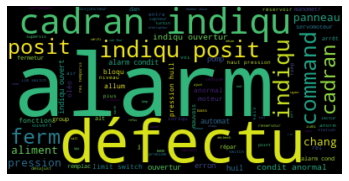

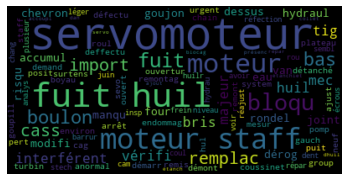

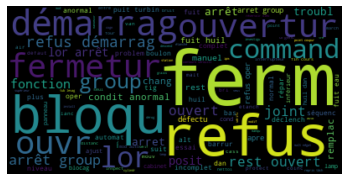

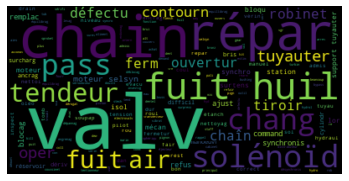

In [21]:
from wordcloud import WordCloud

plt.figure()
plt.subplots()
classes = [cat_0, cat_1, cat_2, cat_3]
for i in classes:
    separator = ','
    wordcloud = WordCloud().generate(separator.join(i))

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show() # Affiché dans l'ordre des classes 0, 1, 2 et 3.

## Feature extraction - Bag of words

In [22]:
X = df['clean_sentence']
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

from sklearn.feature_extraction.text import CountVectorizer 

count_vect = CountVectorizer()
vector = count_vect.fit_transform(X_train)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(vector)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Évaluation des modèles sans Tf-idf

In [24]:
from sklearn.pipeline import Pipeline

# On fixe un random_state pour évaluer les modèles sur la même base

text_clf_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf_1', MultinomialNB())
])

text_clf_2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf_2', SGDClassifier(random_state=42))
])

text_clf_3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf_3', DecisionTreeClassifier(random_state=42))
])


In [25]:
text_clf_1.fit(X_train, y_train) 
text_clf_2.fit(X_train, y_train) 
text_clf_3.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf_3', DecisionTreeClassifier(random_state=42))])

In [26]:
predicted_1 = text_clf_1.predict(X_test)
score_1 = np.mean(predicted_1 == y_test)

predicted_2 = text_clf_2.predict(X_test)
score_2 = np.mean(predicted_2 == y_test)

predicted_3 = text_clf_3.predict(X_test)
score_3 = np.mean(predicted_3 == y_test)

print('MultinomialNB: ',score_1)
print('SGDClassifier: ',score_2)
print('DecisionTree: ',score_3)

MultinomialNB:  0.8345588235294118
SGDClassifier:  0.8823529411764706
DecisionTree:  0.8860294117647058


## Évaluation des modèles avec Tf-idf

In [27]:
text_clf_11 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_11', MultinomialNB())
])

text_clf_22 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_22', SGDClassifier(random_state=42))
])

text_clf_33 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf_33', DecisionTreeClassifier(random_state=42))
])

In [28]:
text_clf_11.fit(X_train, y_train) 
text_clf_22.fit(X_train, y_train) 
text_clf_33.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_33', DecisionTreeClassifier(random_state=42))])

In [29]:
predicted_11 = text_clf_11.predict(X_test)
score_11 = np.mean(predicted_11 == y_test)

predicted_22 = text_clf_22.predict(X_test)
score_22 = np.mean(predicted_22 == y_test)

predicted_33 = text_clf_33.predict(X_test)
score_33 = np.mean(predicted_33 == y_test)

print('MultinomialNB: ',score_11)
print('SGDClassifier: ',score_22)
print('DecisionTree: ',score_33)

MultinomialNB:  0.7536764705882353
SGDClassifier:  0.8713235294117647
DecisionTree:  0.8823529411764706


In [30]:
# Dans les deux cas, SGDClassifier et Decision Tree sont les meilleurs modèles avec des scores relativement proches.
# Essayons d'optimiser ces deux modèles

## Optimisation

In [31]:
from sklearn.model_selection import GridSearchCV

In [52]:
# pour SGDClassifier
parameters = {
    'vect__ngram_range': [(1,1), (1,2), (1,3)],
    'tfidf__use_idf': (True, False),
    'clf_22__alpha': (1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7)
}

gs_clf_22 = GridSearchCV(text_clf_22, parameters, cv=10, n_jobs=-1)

gs_clf_22 = gs_clf_22.fit(X_train, y_train)

print(gs_clf_22.best_params_)
print(gs_clf_22.best_score_)

{'clf_22__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}
0.9036706349206349


In [49]:
# Pour Decision Tree
parameters = {
    'vect__ngram_range': [(1,1), (1,2), (1,3)],
    'tfidf__use_idf': (True, False),
    'clf_33__criterion': ['gini', 'entropy'],
    'clf_33__max_depth': [8,10,12]
}

gs_clf_33 = GridSearchCV(text_clf_33, parameters, cv=10, n_jobs=-1)

gs_clf_33 = gs_clf_33.fit(X_train, y_train)

print(gs_clf_33.best_params_)
print(gs_clf_33.best_score_)

{'clf_33__criterion': 'gini', 'clf_33__max_depth': 12, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
0.8311755952380953


In [51]:
# Après optimisation, on observe que le meilleur modèle est le SGDClassifier avec un score de 90%

# le principal problème est dû au déséquilibre des classes.

# Imprimons de rapport de classification et la matrice de confusion du modèle final

from sklearn.metrics import classification_report, confusion_matrix

predicted = gs_clf_22.best_estimator_.predict(X_test)
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        71
           1       0.85      0.96      0.90        24
           2       0.89      0.97      0.93       131
           3       0.98      0.87      0.92        46

    accuracy                           0.91       272
   macro avg       0.92      0.90      0.91       272
weighted avg       0.92      0.91      0.91       272

[[ 58   1  11   1]
 [  0  23   1   0]
 [  3   1 127   0]
 [  0   2   4  40]]


In [ ]:
# Courbe d'apprentissage

[ 57 114 171 228 285 342 399 456 513 570]


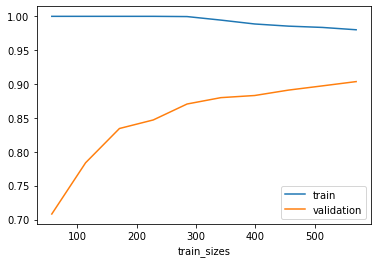

In [53]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(gs_clf_22.best_estimator_, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()